# Import

### lib

In [1]:
import sys
import os

import pandas as pd
import numpy as np
# viz
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
# ML
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.pipeline import Pipeline

In [2]:
sys.path.append("../../")


# from ... import ...

### env & settings

In [3]:
DATA_DIR = "/workspace/Storage/kaggle/Data/insurance"
PATH_TRAIN = os.path.join(DATA_DIR, "raw", "train.csv")
PATH_TEST = os.path.join(DATA_DIR, "raw", "test.csv")

In [4]:
# 출력할 컬럼 수를 충분히 늘리기
pd.set_option('display.max_columns', None)

### Data

In [5]:
train = pd.read_csv(PATH_TRAIN)
test = pd.read_csv(PATH_TEST)

# 0. Objectives

성능 좋은 회귀모델을 만드는 것이 목적이므로 이 EDA에선
1. 데이터 유형 파악
2. 데이터 유형에 따른 데이터 전처리 결정(형태 변환, 결측치, 이상치)
3. 모델 요구사항 도출 및 베이스라인 모델 선정
을 목표로 한다.

따라서 산출물은
1. 데이터 유형
2. 전처리 pipeline
3. 모델 요구사항
4. 베이스라인 모델

# 1. Analysis

## 1.1 overview

### 1.1.1 offered description

Dataset Description

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Insurance Premium Prediction dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

Files

- train.csv - the training dataset; Premium Amount is the continuous target
- test.csv - the test dataset; your objective is to predict target Premium Amount for each row
- sample_submission.csv - a sample submission file in the correct format

Insurance Premium Prediction Dataset

Problem Statement

The goal of this dataset is to facilitate the development and testing of regression models for predicting insurance premiums based on various customer characteristics and policy details. Insurance companies often rely on data-driven approaches to estimate premiums, taking into account factors such as age, income, health status, and claim history. This synthetic dataset simulates real-world scenarios to help practitioners practice feature engineering, data cleaning, and model training.

Dataset Overview

This dataset contains 2Lk+ and 20 features with a mix of categorical, numerical, and text data. It includes missing values, incorrect data types, and skewed distributions to mimic the complexities faced in real-world datasets. The target variable for prediction is the "Premium Amount".

Features

- Age: Age of the insured individual (Numerical)
- Gender: Gender of the insured individual (Categorical: Male, Female)
- Annual Income: Annual income of the insured individual (Numerical, skewed)
- Marital Status: Marital status of the insured individual (Categorical: Single, Married, Divorced)
- Number of Dependents: Number of dependents (Numerical, with missing values)
- Education Level: Highest education level attained (Categorical: High School, Bachelor's, Master's, PhD)
- Occupation: Occupation of the insured individual (Categorical: Employed, Self-Employed, Unemployed)
- Health Score: A score representing the health status (Numerical, skewed)
- Location: Type of location (Categorical: Urban, Suburban, Rural)
- Policy Type: Type of insurance policy (Categorical: Basic, Comprehensive, Premium)
- Previous Claims: Number of previous claims made (Numerical, with outliers)
- Vehicle Age: Age of the vehicle insured (Numerical)
- Credit Score: Credit score of the insured individual (Numerical, with missing values)
- Insurance Duration: Duration of the insurance policy (Numerical, in years)
- Premium Amount: Target variable representing the insurance premium amount (Numerical, skewed)
- Policy Start Date: Start date of the insurance policy (Text, improperly formatted)
- Customer Feedback: Short feedback comments from customers (Text)
- Smoking Status: Smoking status of the insured individual (Categorical: Yes, No)
- Exercise Frequency: Frequency of exercise (Categorical: Daily, Weekly, Monthly, Rarely)
- Property Type: Type of property owned (Categorical: House, Apartment, Condo)

Data Characteristics
- Missing Values: Certain features contain missing values to simulate real-world data collection issues.
- Incorrect Data Types: Some fields are intentionally set to incorrect data types to practice data cleaning.
- Skewed Distributions: Numerical features like Annual Income and Premium Amount have skewed distributions, which can be addressed through transformations.

Usage

This dataset can be used for:
- Practicing feature engineering techniques.
- Implementing data cleaning and preprocessing steps.
- Training regression models for predicting insurance premiums.
- Evaluating model performance and tuning hyperparameters.

License

This synthetic dataset is created for educational purposes and can be used freely for practice and experimentation.

### 1.1.2 train

In [6]:
train.shape

(1200000, 21)

In [7]:
train.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

In [8]:
train.head(5)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


<Axes: >

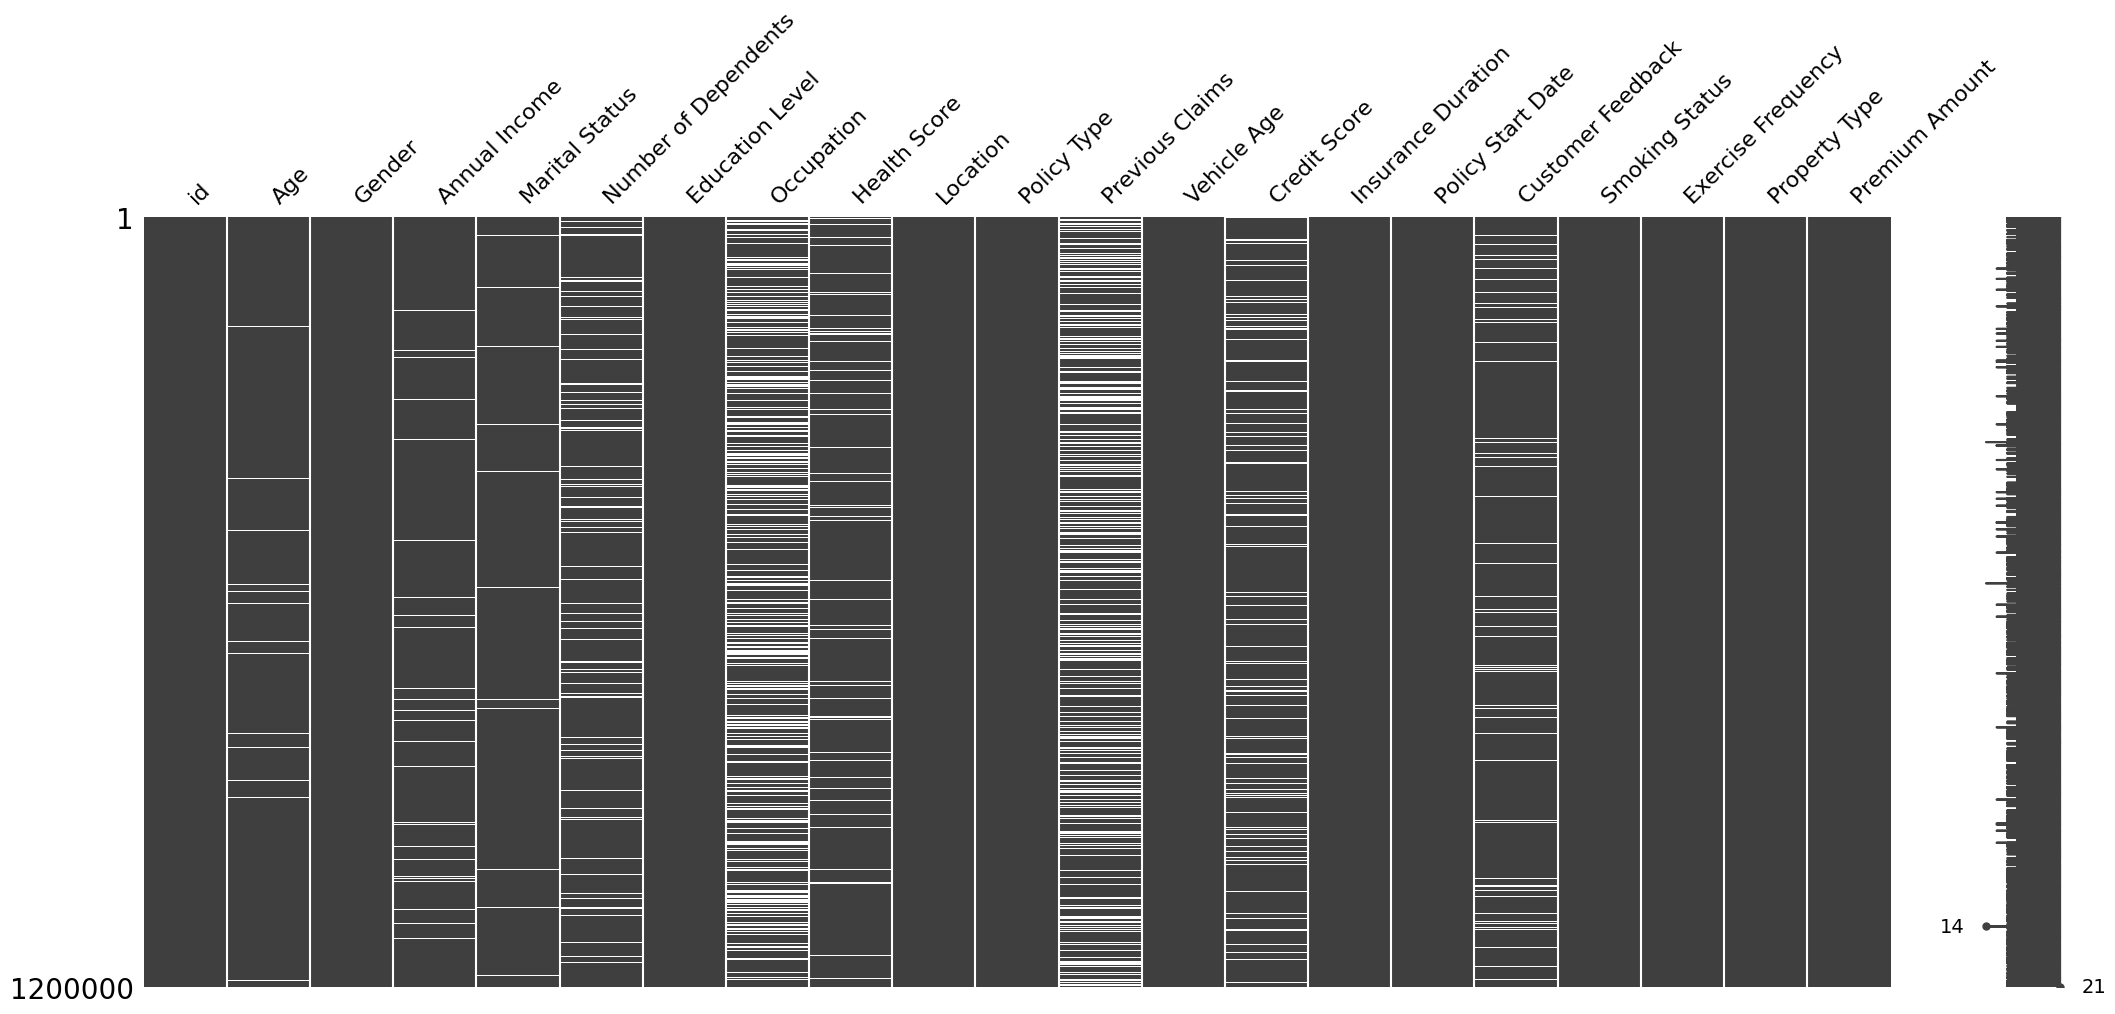

In [9]:
msno.matrix(train)

### 1.1.3 test

In [10]:
test.shape

(800000, 20)

In [11]:
test.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type'],
      dtype='object')

In [12]:
test.head(5)

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House


<Axes: >

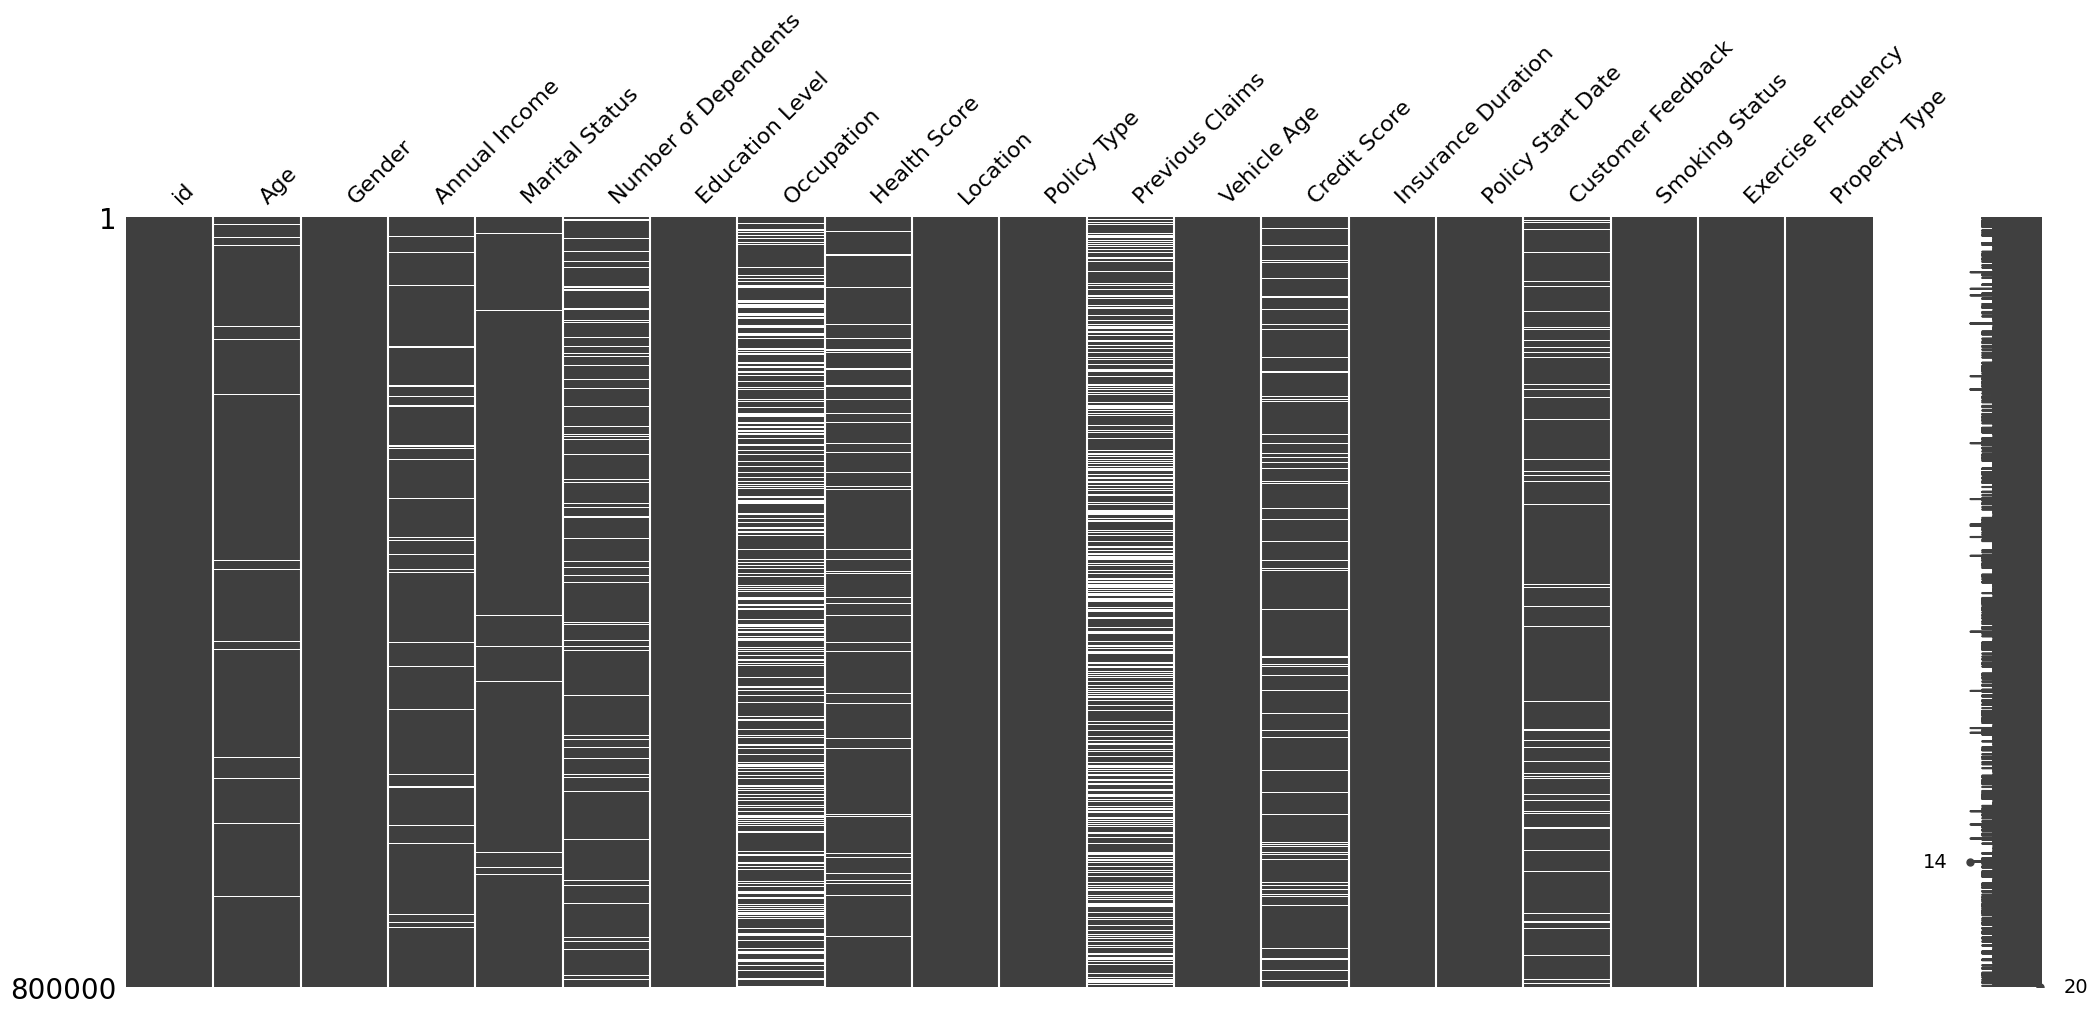

In [13]:
msno.matrix(test)

### 1.1.4 opinion
- 원본 데이터가 존재하며 제공된 데이터는 원본으로부터 AI로 생성된 데이터
- 시계열성은 옅음
- 공간데이터 없음
- Premium Amount가 타겟

In [234]:
EDA_result = pd.DataFrame(train.columns, columns = ["name"])
EDA_result["type"] = np.nan
EDA_result["mv_process"] = np.nan
EDA_result["transform"] = np.nan
EDA_result.set_index("name", inplace = True)

## 1.2 Univariate Analysis

In [247]:
def calculate_mvrate(series):
    return f"{round(series.isna().sum()/len(series)*100, 2)}%"

In [249]:
def violin_plot(df, col):
    # 바이올린 플롯 생성
    plt.figure(figsize=(8, 6))
    sns.violinplot(data=df[col], palette='muted')

    # 플롯 꾸미기
    plt.title(f'Distribution of {col}')
    plt.xlabel(f'{col}(count)')
    plt.ylabel('Value')

    plt.show()

### 1.2.1 Targets

#### 1) Premium Amount

##### dtype

In [14]:
# type
train['Premium Amount'].map(type).value_counts()

Premium Amount
<class 'float'>    1200000
Name: count, dtype: int64

##### Descriptive statistics

In [15]:
train['Premium Amount'].describe().map(int)

count    1200000
mean        1102
std          864
min           20
25%          514
50%          872
75%         1509
max         4999
Name: Premium Amount, dtype: int64

<Axes: >

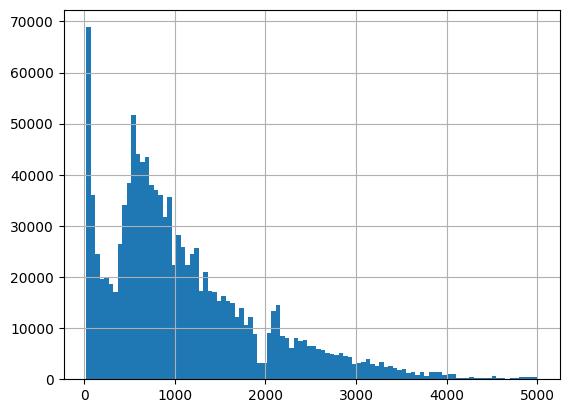

In [16]:
# distribution
train['Premium Amount'].hist(bins = 100)

/tmp/ipykernel_8876/4026228438.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df[col], palette='muted')


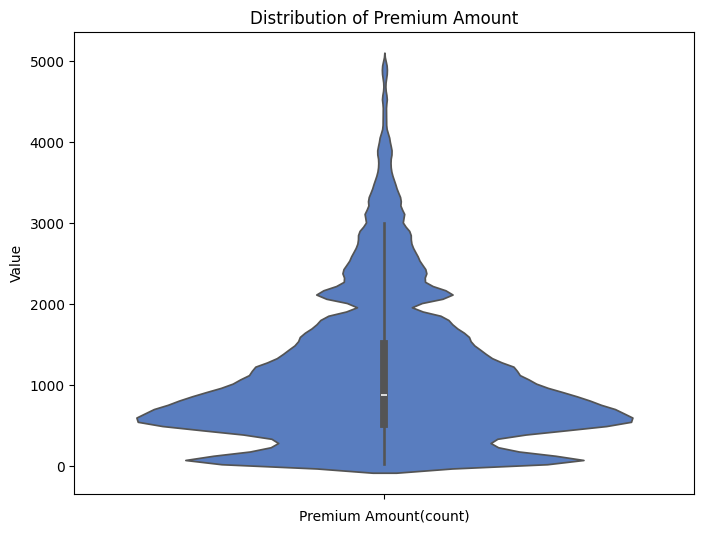

In [250]:
violin_plot(train, "Premium Amount")

In [259]:
# missing values
calculate_mvrate(train['Premium Amount'])


'0.0%'

- opinion
    - ratio type
    - 추후 box cox 변환 시도
    - 결측이 없지만 타겟이므로 결측이 생긴다면 일단 drop을 한다.
    - 이상치는 없다. 보험료에 대한 설명에 특별한 조건이 없으므로 0보다 작거나 지나치게 큰 경우를 이상치로 가정할 수 있으나 descriptive statistics 확인 결과 해당 없다.

In [317]:
cat = 'Premium Amount'
EDA_result['type'][cat] = "ratio"
EDA_result['mv_process'][cat] = "drop"
EDA_result['transform'][cat] = "box-cox"

### 1.2.2 Features

#### 1) id

##### dtype

In [19]:
# type
train['id'].map(type).value_counts()

id
<class 'int'>    1200000
Name: count, dtype: int64

##### Descriptive statistics

In [20]:
train['id'].describe().map(int)

count    1200000
mean      599999
std       346410
min            0
25%       299999
50%       599999
75%       899999
max      1199999
Name: id, dtype: int64

In [21]:
test['id'].describe().map(int)

count     800000
mean     1599999
std       230940
min      1200000
25%      1399999
50%      1599999
75%      1799999
max      1999999
Name: id, dtype: int64

##### Missing values

In [261]:
# missing values 1
cat = 'id'
calculate_mvrate(train[cat]), calculate_mvrate(test[cat])

('0.0%', '0.0%')

In [24]:
# missing values 2
train['id'].diff().value_counts()

id
1.0    1199999
Name: count, dtype: int64

In [25]:
# missing values 2
test['id'].diff().value_counts()

id
1.0    799999
Name: count, dtype: int64

In [26]:
# duplicated id
set(train['id']) & set(test['id'])

set()

In [27]:
# duplicated case
train.drop('id', axis=1).duplicated().sum()

np.int64(0)

In [28]:
# duplicated case
test.drop('id', axis=1).duplicated().sum()

np.int64(0)

- opinion
    - 결함 없는 id값이므로 무시한다.

In [315]:
cat = 'id'
EDA_result['type'][cat] = "interval"
EDA_result['mv_process'][cat] = ""
EDA_result['transform'][cat] = "drop"

#### 2) Age


##### dtype

In [29]:
# type
train['Age'].map(type).value_counts()

Age
<class 'float'>    1200000
Name: count, dtype: int64

In [30]:
# type
test['Age'].map(type).value_counts()

Age
<class 'float'>    800000
Name: count, dtype: int64

##### Descriptive statistics

In [31]:
train['Age'].describe().map(int)

count    1181295
mean          41
std           13
min           18
25%           30
50%           41
75%           53
max           64
Name: Age, dtype: int64

In [32]:
test['Age'].describe().map(int)

count    787511
mean         41
std          13
min          18
25%          30
50%          41
75%          53
max          64
Name: Age, dtype: int64

<Axes: >

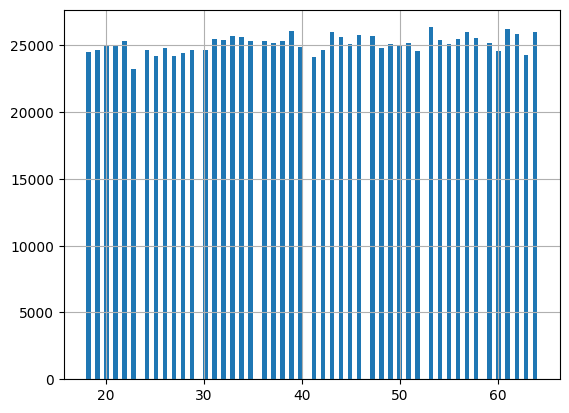

In [33]:
train['Age'].hist(bins=100)

<Axes: >

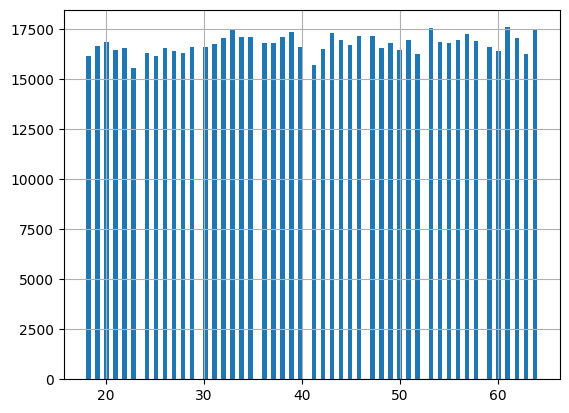

In [34]:
test['Age'].hist(bins=100)

##### Missing values

In [262]:
# missing values 1
cat = 'Age'
calculate_mvrate(train[cat]), calculate_mvrate(test[cat])

('1.56%', '1.56%')

- opinion
    - inverval type
    - 결측이 적고 균등분포이므로 중앙값 주입을 한다
    - 이상치는 없다.

In [314]:
cat = "Age"
EDA_result['type'][cat] = "interval"
EDA_result['mv_process'][cat] = "median"
EDA_result['transform'][cat] = ""

#### 3) Gender

##### dtype

In [39]:
# type
train['Gender'].map(type).value_counts()

Gender
<class 'str'>    1200000
Name: count, dtype: int64

In [40]:
# type
test['Gender'].map(type).value_counts()

Gender
<class 'str'>    800000
Name: count, dtype: int64

##### Descriptive statistics

In [41]:
train['Gender'].describe()

count     1200000
unique          2
top          Male
freq       602571
Name: Gender, dtype: object

In [42]:
test['Gender'].describe()

count     800000
unique         2
top         Male
freq      401089
Name: Gender, dtype: object

<Axes: xlabel='Gender'>

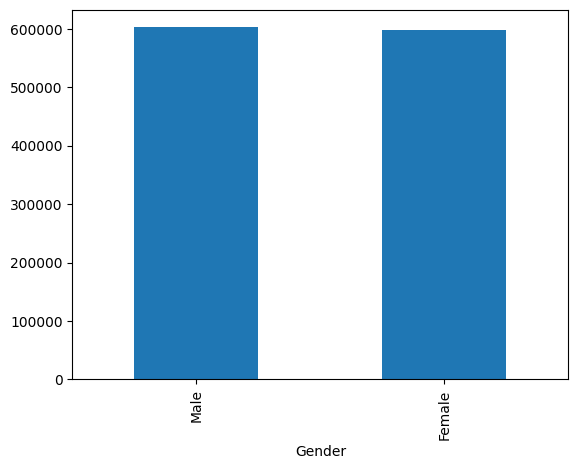

In [43]:
train['Gender'].value_counts().plot(kind='bar')

<Axes: xlabel='Gender'>

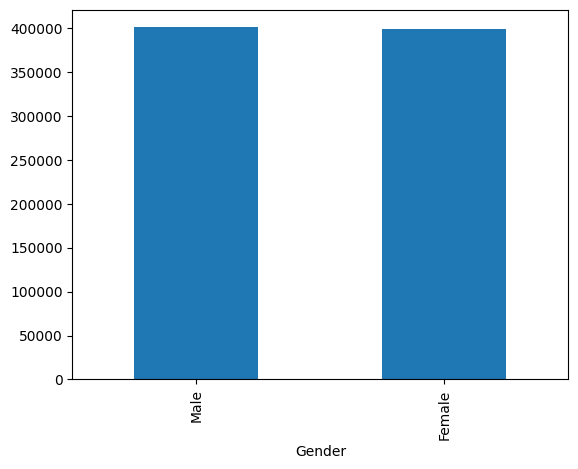

In [44]:
test['Gender'].value_counts().plot(kind='bar')

##### Missing values

In [263]:
# missing values 1
cat = 'Gender'
calculate_mvrate(train[cat]), calculate_mvrate(test[cat])

('0.0%', '0.0%')

- opinion
    - nominal type
    - 결측률이 적으므로 결측 시 최빈값 주입을 한다
    - 이상치는 없다.

In [313]:
cat = "Gender"
EDA_result['type'][cat] = "nominal"
EDA_result['mv_process'][cat] = "random(uniform)"
EDA_result['transform'][cat] = "encoding(nominal)"

#### 4) Annual Income

##### dtype

In [47]:
# type
train['Annual Income'].map(type).value_counts()

Annual Income
<class 'float'>    1200000
Name: count, dtype: int64

In [48]:
# type
test['Annual Income'].map(type).value_counts()

Annual Income
<class 'float'>    800000
Name: count, dtype: int64

##### Descriptive statistics

In [49]:
train['Annual Income'].describe().map(int)

count    1155051
mean       32745
std        32179
min            1
25%         8001
50%        23911
75%        44634
max       149997
Name: Annual Income, dtype: int64

In [50]:
test['Annual Income'].describe().map(int)

count    770140
mean      32803
std       32201
min           2
25%        8048
50%       23981
75%       44660
max      149997
Name: Annual Income, dtype: int64

<Axes: >

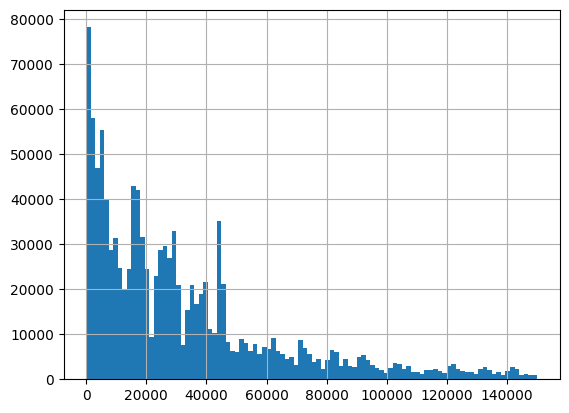

In [51]:
train['Annual Income'].hist(bins=100)

<Axes: >

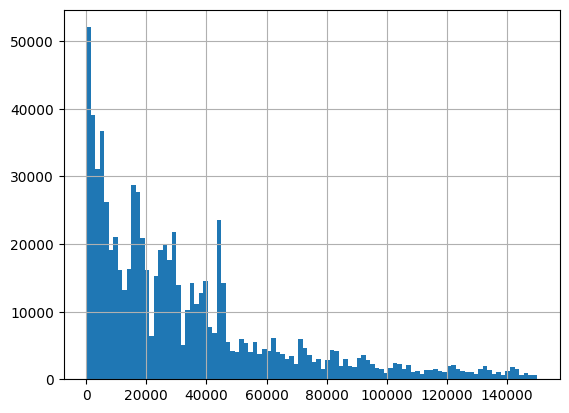

In [52]:
test['Annual Income'].hist(bins=100)

/tmp/ipykernel_8876/4026228438.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df[col], palette='muted')


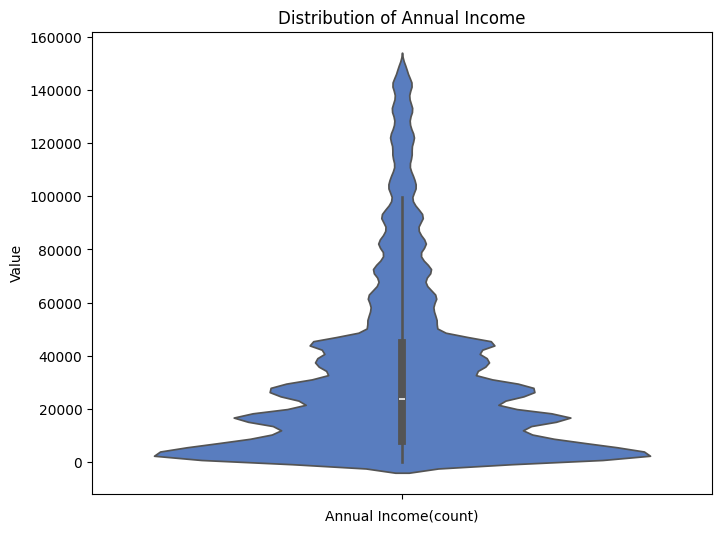

In [251]:
violin_plot(train, "Annual Income")

/tmp/ipykernel_8876/4026228438.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df[col], palette='muted')


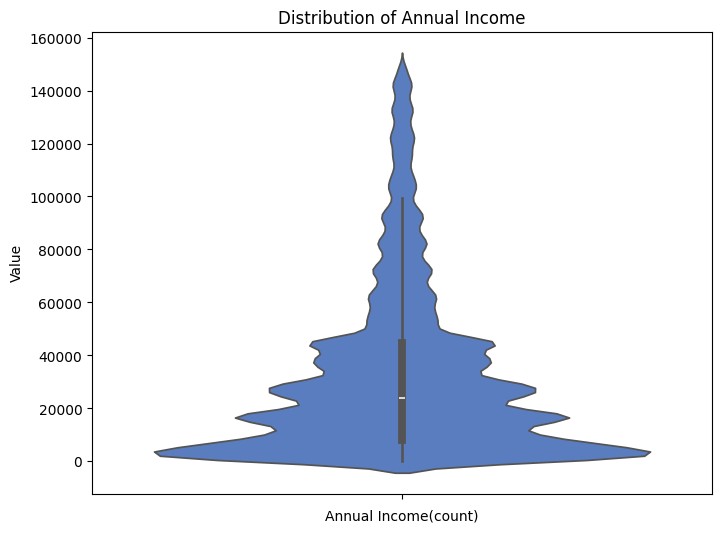

In [252]:
violin_plot(test, "Annual Income")

##### Missing values

In [264]:
# missing values 1
cat = 'Annual Income'
calculate_mvrate(train[cat]), calculate_mvrate(test[cat])

('3.75%', '3.73%')

- opinion
    - ratio type
    - 추후 box cox 변환
    - 결측 시 중앙값 주입을 한다
    - 이상치는 보이지 않지만 단위나 수집배경에 따라 아주 낮은 값들이 이상치가 될 수 있다.

In [318]:
cat = "Annual Income"
EDA_result['type'][cat] = "ratio"
EDA_result['mv_process'][cat] = "median"
EDA_result['transform'][cat] = "box-cox"

#### 5) Marital Status

##### dtype

In [57]:
# type
train['Marital Status'].dropna().map(type).value_counts()

Marital Status
<class 'str'>    1181471
Name: count, dtype: int64

In [58]:
# type
test['Marital Status'].dropna().map(type).value_counts()

Marital Status
<class 'str'>    787664
Name: count, dtype: int64

##### Descriptive statistics

In [59]:
train['Marital Status'].describe()

count     1181471
unique          3
top        Single
freq       395391
Name: Marital Status, dtype: object

In [60]:
test['Marital Status'].describe()

count     787664
unique         3
top       Single
freq      263705
Name: Marital Status, dtype: object

<Axes: xlabel='Marital Status'>

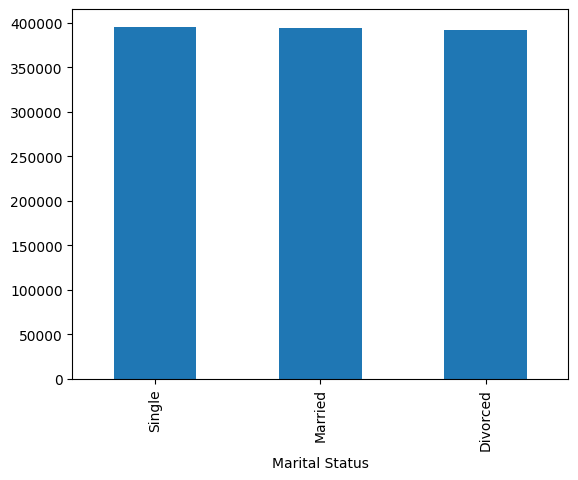

In [61]:
train['Marital Status'].value_counts().plot(kind='bar')

<Axes: xlabel='Marital Status'>

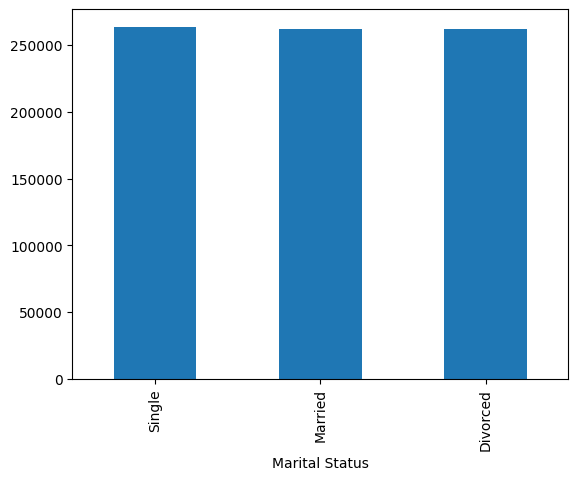

In [62]:
test['Marital Status'].value_counts().plot(kind='bar')

##### Missing values

In [265]:
# missing values 1
cat = 'Marital Status'
calculate_mvrate(train[cat]), calculate_mvrate(test[cat])

('1.54%', '1.54%')

- opinion
    - nominal type
    - 결측 시 uniform하게 랜덤 주입을 한다
    - 이상치는 없다

In [312]:
cat = "Marital Status"
EDA_result['type'][cat] = "nominal"
EDA_result['mv_process'][cat] = "random(uniform)"
EDA_result['transform'][cat] = "encoding(nominal)"

#### 6) Number of Dependents

##### dtype

In [65]:
# type
train['Number of Dependents'].map(type).value_counts()

Number of Dependents
<class 'float'>    1200000
Name: count, dtype: int64

In [66]:
# type
test['Number of Dependents'].map(type).value_counts()

Number of Dependents
<class 'float'>    800000
Name: count, dtype: int64

##### Descriptive statistics

In [67]:
train['Number of Dependents'].describe().map(int)

count    1090328
mean           2
std            1
min            0
25%            1
50%            2
75%            3
max            4
Name: Number of Dependents, dtype: int64

In [68]:
test['Number of Dependents'].describe().map(int)

count    726870
mean          2
std           1
min           0
25%           1
50%           2
75%           3
max           4
Name: Number of Dependents, dtype: int64

<Axes: >

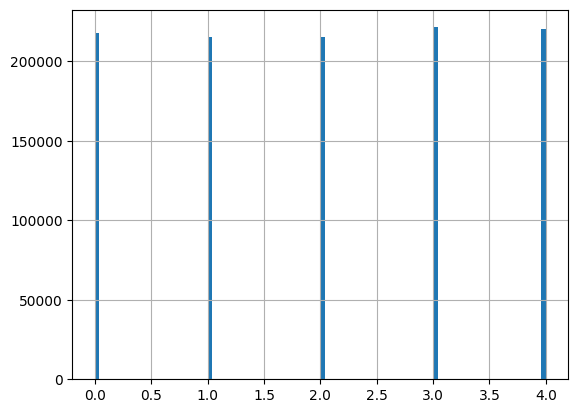

In [69]:
train['Number of Dependents'].hist(bins=100)

<Axes: >

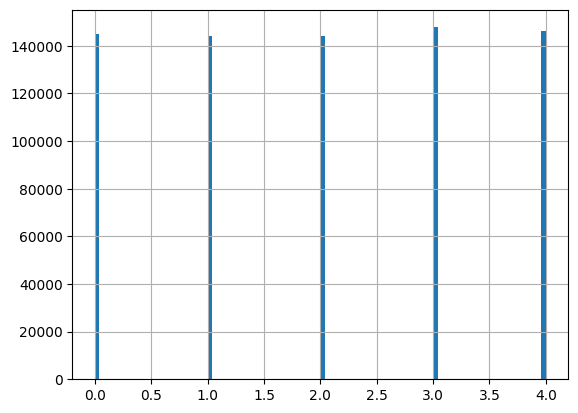

In [70]:
test['Number of Dependents'].hist(bins=100)

##### Missing values

In [266]:
# missing values 1
cat = 'Number of Dependents'
calculate_mvrate(train[cat]), calculate_mvrate(test[cat])

('9.14%', '9.14%')

- opinion
    - interval type
    - 결측률이 높으므로 결측 시 기존 분산과 같이 uniform하게 랜덤 주입을 한다
    - 이상치는 없다

In [ ]:
cat = "Number of Dependents"
EDA_result['type'][cat] = "interval"
EDA_result['mv_process'][cat] = "random(uniform)"
EDA_result['transform'][cat] = ""

#### 7) Education Level

##### dtype

In [73]:
# type
train['Education Level'].map(type).value_counts()

Education Level
<class 'str'>    1200000
Name: count, dtype: int64

In [74]:
# type
test['Education Level'].map(type).value_counts()

Education Level
<class 'str'>    800000
Name: count, dtype: int64

##### Descriptive statistics

In [75]:
train['Education Level'].describe()

count      1200000
unique           4
top       Master's
freq        303818
Name: Education Level, dtype: object

In [76]:
test['Education Level'].describe()

count       800000
unique           4
top       Master's
freq        202552
Name: Education Level, dtype: object

<Axes: xlabel='Education Level'>

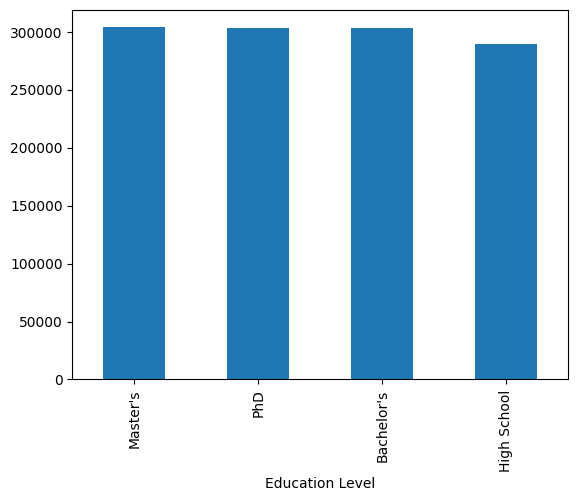

In [77]:
train['Education Level'].value_counts().plot(kind='bar')

<Axes: xlabel='Education Level'>

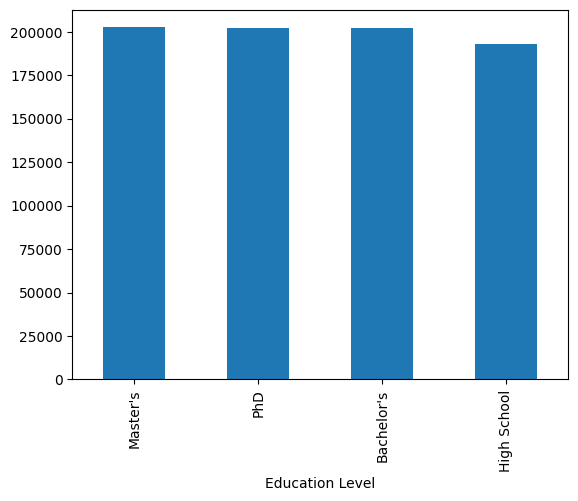

In [78]:
test['Education Level'].value_counts().plot(kind='bar')

##### Missing values

In [267]:
# missing values 1
cat = 'Education Level'
calculate_mvrate(train[cat]), calculate_mvrate(test[cat])

('0.0%', '0.0%')

- opinion
    - ordinal type
    - 결측률 적으므로 최빈값 주입
    - 이상치는 없다

In [311]:
cat = "Education Level"
EDA_result['type'][cat] = "ordinal"
EDA_result['mv_process'][cat] = "mode"
EDA_result['transform'][cat] = "encoding(ordinal)"

#### 8) Occupation

##### dtype

In [81]:
# type
train['Occupation'].dropna().map(type).value_counts()

Occupation
<class 'str'>    841925
Name: count, dtype: int64

In [82]:
# type
test['Occupation'].dropna().map(type).value_counts()

Occupation
<class 'str'>    560875
Name: count, dtype: int64

##### Descriptive statistics

In [83]:
train['Occupation'].describe()

count       841925
unique           3
top       Employed
freq        282750
Name: Occupation, dtype: object

In [84]:
test['Occupation'].describe()

count       560875
unique           3
top       Employed
freq        188574
Name: Occupation, dtype: object

<Axes: xlabel='Occupation'>

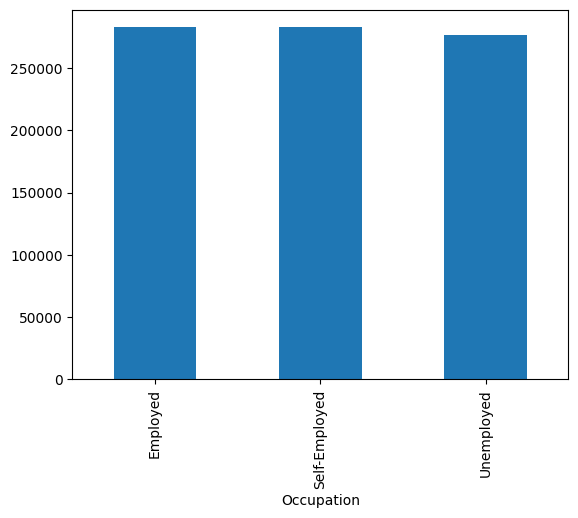

In [85]:
train['Occupation'].value_counts().plot(kind='bar')

<Axes: xlabel='Occupation'>

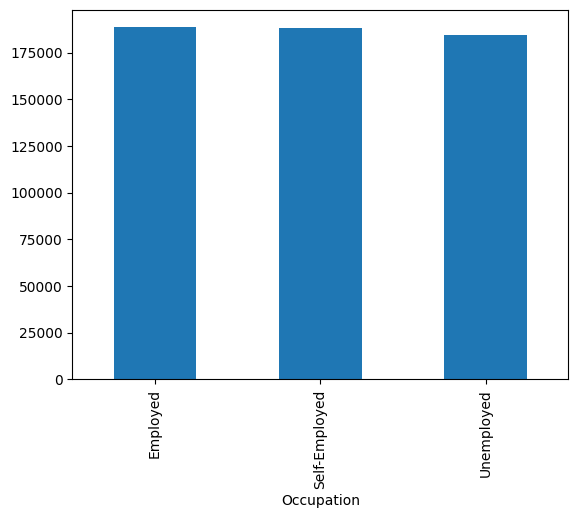

In [86]:
test['Occupation'].value_counts().plot(kind='bar')

##### Missing values

In [268]:
# missing values 1
cat = 'Occupation'
calculate_mvrate(train[cat]), calculate_mvrate(test[cat])

('29.84%', '29.89%')

- opinion
    - nominal type
    - 결측이 높으므로 uniform하게 랜덤 주입을 한다
    - 이상치는 없다

In [310]:
cat = "Occupation"
EDA_result['type'][cat] = "nominal"
EDA_result['mv_process'][cat] = "random(uniform)"
EDA_result['transform'][cat] = "encoding(nominal)"

#### 9) Health Score

##### dtype

In [89]:
# type
train['Health Score'].map(type).value_counts()

Health Score
<class 'float'>    1200000
Name: count, dtype: int64

In [90]:
# type
test['Health Score'].map(type).value_counts()

Health Score
<class 'float'>    800000
Name: count, dtype: int64

##### Descriptive statistics

In [91]:
train['Health Score'].describe().map(int)

count    1125924
mean          25
std           12
min            2
25%           15
50%           24
75%           34
max           58
Name: Health Score, dtype: int64

In [92]:
test['Health Score'].describe().map(int)

count    750551
mean         25
std          12
min           1
25%          15
50%          24
75%          34
max          57
Name: Health Score, dtype: int64

<Axes: >

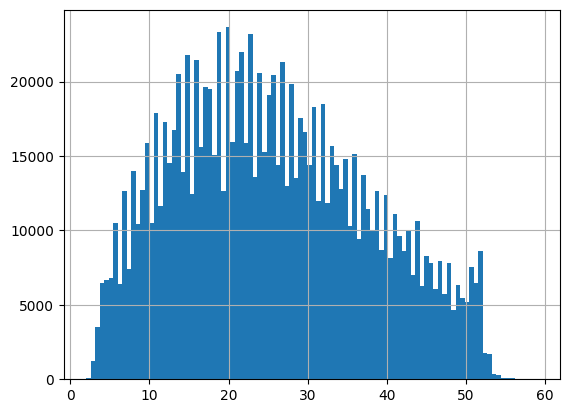

In [93]:
train['Health Score'].hist(bins=100)

<Axes: >

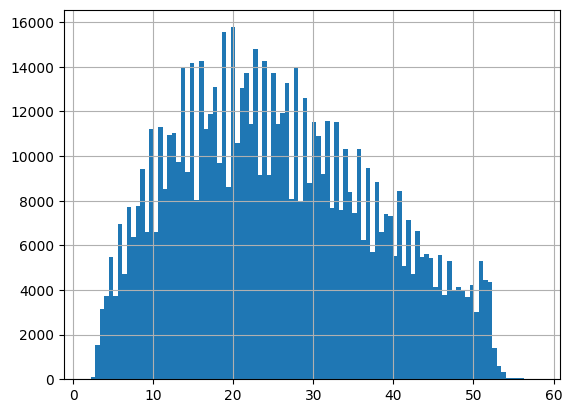

In [94]:
test['Health Score'].hist(bins=100)

/tmp/ipykernel_8876/4026228438.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df[col], palette='muted')


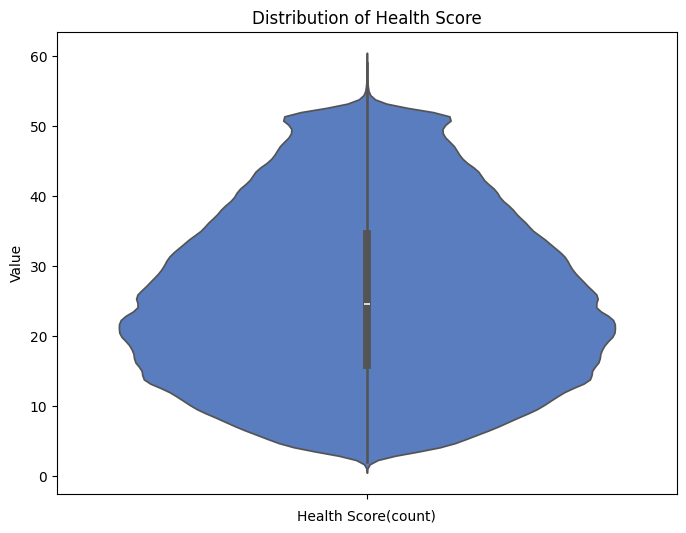

In [253]:
violin_plot(train, "Health Score")

/tmp/ipykernel_8876/4026228438.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df[col], palette='muted')


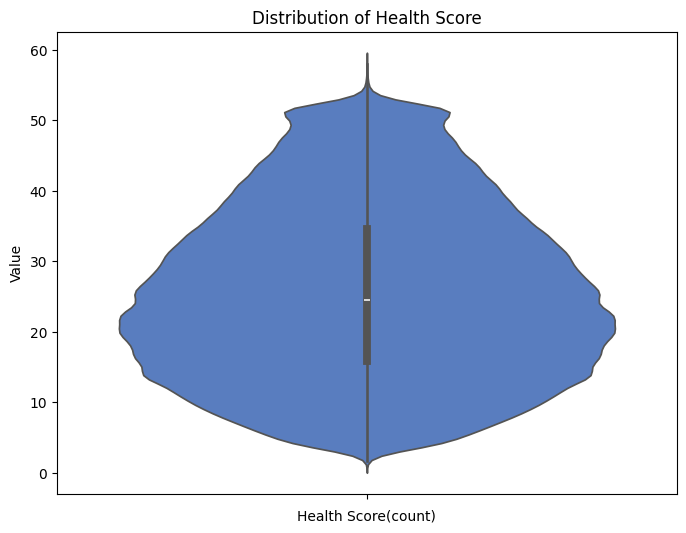

In [254]:
violin_plot(test, "Health Score")

##### Missing values

In [269]:
# missing values 1
cat = 'Health Score'
calculate_mvrate(train[cat]), calculate_mvrate(test[cat])

('6.17%', '6.18%')

- opinion
    - ratio type
    - 결측시 평균값 주입을 한다
    - 이상치는 보이지않는다

In [295]:
cat = "Health Score"
EDA_result['type'][cat] = "ratio"
EDA_result['mv_process'][cat] = "mean"
EDA_result['transform'][cat] = ""

#### 10) Location

##### dtype

In [99]:
# type
train['Location'].map(type).value_counts()

Location
<class 'str'>    1200000
Name: count, dtype: int64

In [100]:
# type
test['Location'].map(type).value_counts()

Location
<class 'str'>    800000
Name: count, dtype: int64

##### Descriptive statistics

In [101]:
train['Location'].describe()

count      1200000
unique           3
top       Suburban
freq        401542
Name: Location, dtype: object

In [102]:
test['Location'].describe()

count       800000
unique           3
top       Suburban
freq        267190
Name: Location, dtype: object

<Axes: xlabel='Location'>

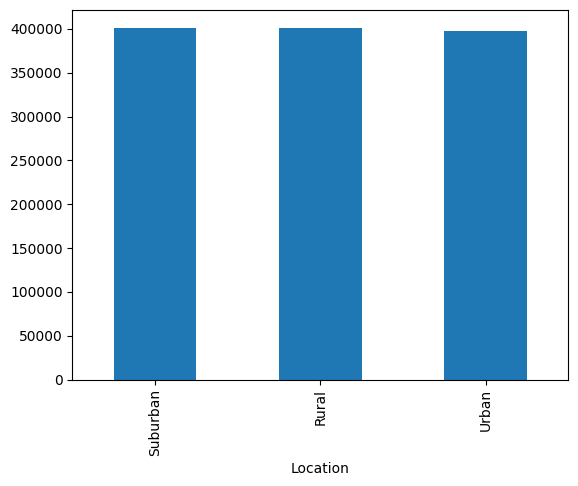

In [103]:
train['Location'].value_counts().plot(kind='bar')

<Axes: xlabel='Location'>

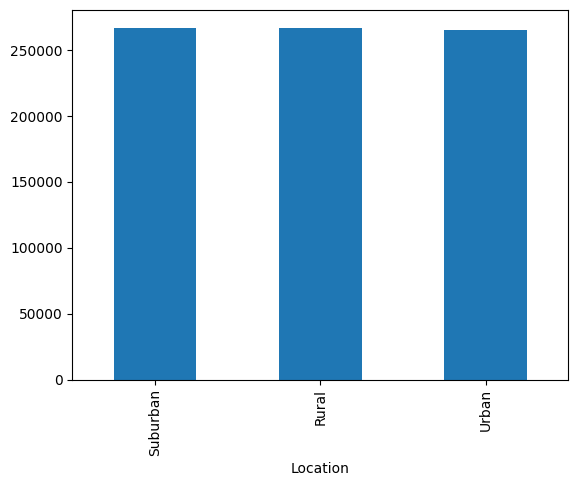

In [104]:
test['Location'].value_counts().plot(kind='bar')

##### Missing values

In [270]:
# missing values 1
cat = 'Location'
calculate_mvrate(train[cat]), calculate_mvrate(test[cat])

('0.0%', '0.0%')

- opinion
    - nominal type이지만 ordinal 변환 가능
    - 결측률 적으므로 최빈값 주입을 한다
    - 이상치는 없다

In [309]:
cat = "Location"
EDA_result['type'][cat] = "nominal"
EDA_result['mv_process'][cat] = "mode"
EDA_result['transform'][cat] = "encoding(nominal)"

#### 11) Policy Type

##### dtype

In [107]:
# type
train['Policy Type'].map(type).value_counts()

Policy Type
<class 'str'>    1200000
Name: count, dtype: int64

In [108]:
# type
test['Policy Type'].map(type).value_counts()

Policy Type
<class 'str'>    800000
Name: count, dtype: int64

##### Descriptive statistics

In [109]:
train['Policy Type'].describe()

count     1200000
unique          3
top       Premium
freq       401846
Name: Policy Type, dtype: object

In [110]:
test['Policy Type'].describe()

count      800000
unique          3
top       Premium
freq       267629
Name: Policy Type, dtype: object

<Axes: xlabel='Policy Type'>

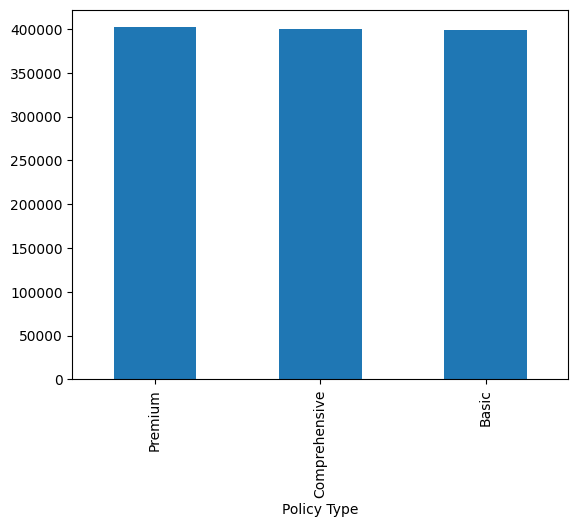

In [111]:
train['Policy Type'].value_counts().plot(kind='bar')

<Axes: xlabel='Policy Type'>

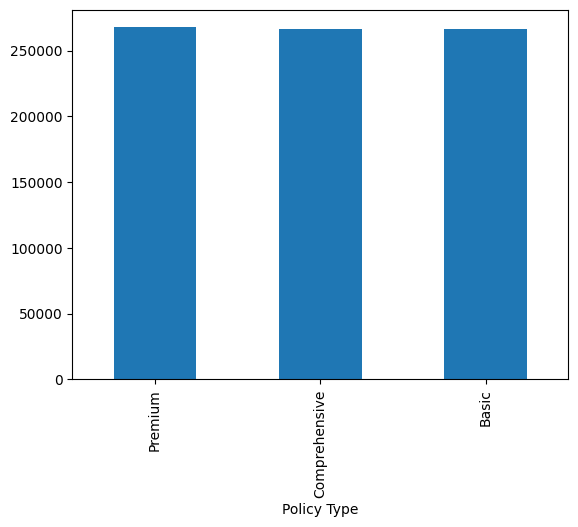

In [112]:
test['Policy Type'].value_counts().plot(kind='bar')

##### Missing values

In [271]:
# missing values 1
cat = 'Policy Type'
calculate_mvrate(train[cat]), calculate_mvrate(test[cat])

('0.0%', '0.0%')

- opinion
    - ordinal type
    - 결측률 적으므로 최빈값 주입
    - 이상치는 보이지않는다

In [308]:
cat = "Policy Type"
EDA_result['type'][cat] = "ordinal"
EDA_result['mv_process'][cat] = "mode"
EDA_result['transform'][cat] = "encoding(ordinal)"

#### 12) Previous Claims

##### dtype

In [115]:
# type
train['Previous Claims'].map(type).value_counts()

Previous Claims
<class 'float'>    1200000
Name: count, dtype: int64

In [116]:
# type
test['Previous Claims'].map(type).value_counts()

Previous Claims
<class 'float'>    800000
Name: count, dtype: int64

##### Descriptive statistics

In [117]:
train['Previous Claims'].describe().map(int)

count    835971
mean          1
std           0
min           0
25%           0
50%           1
75%           2
max           9
Name: Previous Claims, dtype: int64

In [118]:
test['Previous Claims'].describe().map(int)

count    557198
mean          1
std           0
min           0
25%           0
50%           1
75%           2
max           9
Name: Previous Claims, dtype: int64

<Axes: >

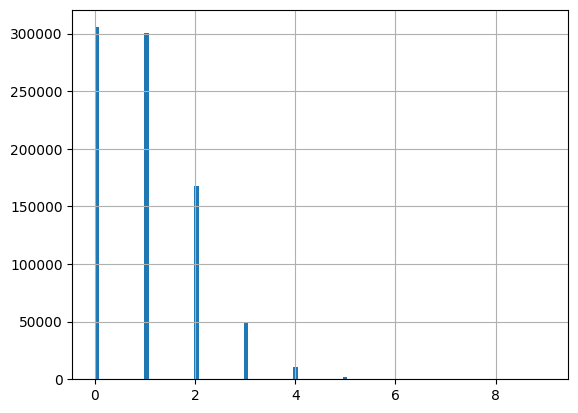

In [119]:
train['Previous Claims'].hist(bins=100)

<Axes: >

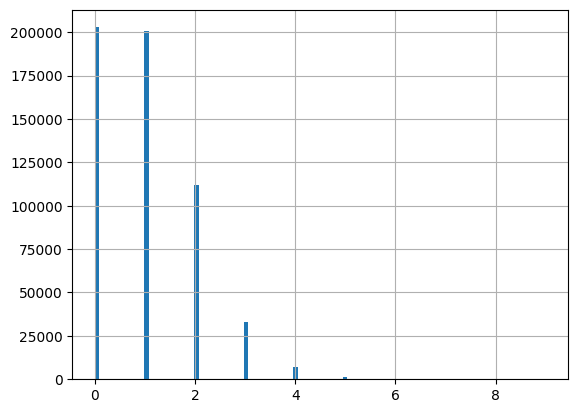

In [120]:
test['Previous Claims'].hist(bins=100)

##### Missing values

In [272]:
# missing values 1
cat = 'Previous Claims'
calculate_mvrate(train[cat]), calculate_mvrate(test[cat])

('30.34%', '30.35%')

- opinion
    - interval type
    - 결측시 0 주입을 한다
    - 이상치는 보이지않는다

In [298]:
cat = "Previous Claims"
EDA_result['type'][cat] = "interval"
EDA_result['mv_process'][cat] = "zero"
EDA_result['transform'][cat] = ""

#### 13) Vehicle Age

##### dtype

In [123]:
# type
train['Vehicle Age'].map(type).value_counts()

Vehicle Age
<class 'float'>    1200000
Name: count, dtype: int64

In [124]:
# type
test['Vehicle Age'].map(type).value_counts()

Vehicle Age
<class 'float'>    800000
Name: count, dtype: int64

In [203]:
(~train['Vehicle Age'].dropna().map(lambda x: x == int(x))).sum()

np.int64(0)

In [204]:
(~test['Vehicle Age'].dropna().map(lambda x: x == int(x))).sum()

np.int64(0)

In [227]:
train["Vehicle Age"] = train["Vehicle Age"].astype('Int64')
test["Vehicle Age"] = test["Vehicle Age"].astype('Int64')

##### Descriptive statistics

In [229]:
train['Vehicle Age'].describe().map(int)

count    1199994
mean           9
std            5
min            0
25%            5
50%           10
75%           15
max           19
Name: Vehicle Age, dtype: int64

In [230]:
test['Vehicle Age'].describe().map(int)

count    799997
mean          9
std           5
min           0
25%           5
50%          10
75%          15
max          19
Name: Vehicle Age, dtype: int64

<Axes: >

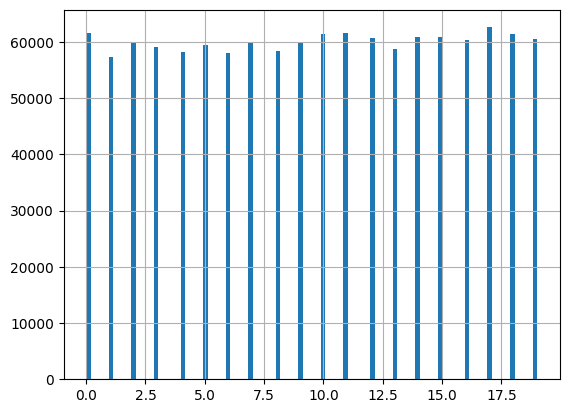

In [231]:
train['Vehicle Age'].hist(bins=100)

<Axes: >

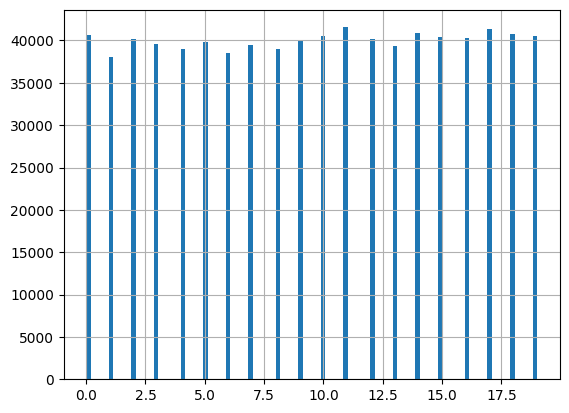

In [128]:
test['Vehicle Age'].hist(bins=100)

##### Missing values

In [273]:
# missing values 1
cat = 'Vehicle Age'
calculate_mvrate(train[cat]), calculate_mvrate(test[cat])

('0.0%', '0.0%')

- opinion
    - ratio type
    - 결측률이 적으므로 중앙값 주입을 한다
    - 이상치는 보이지않는다

In [299]:
cat = "Vehicle Age"
EDA_result['type'][cat] = "ratio"
EDA_result['mv_process'][cat] = "median"
EDA_result['transform'][cat] = ""

#### 14) Credit Score

##### dtype

In [131]:
# type
train['Credit Score'].map(type).value_counts()

Credit Score
<class 'float'>    1200000
Name: count, dtype: int64

In [132]:
# type
test['Credit Score'].map(type).value_counts()

Credit Score
<class 'float'>    800000
Name: count, dtype: int64

##### Descriptive statistics

In [133]:
train['Credit Score'].describe().map(int)

count    1062118
mean         592
std          149
min          300
25%          468
50%          595
75%          721
max          849
Name: Credit Score, dtype: int64

In [134]:
test['Credit Score'].describe().map(int)

count    708549
mean        592
std         150
min         300
25%         468
50%         595
75%         721
max         849
Name: Credit Score, dtype: int64

<Axes: >

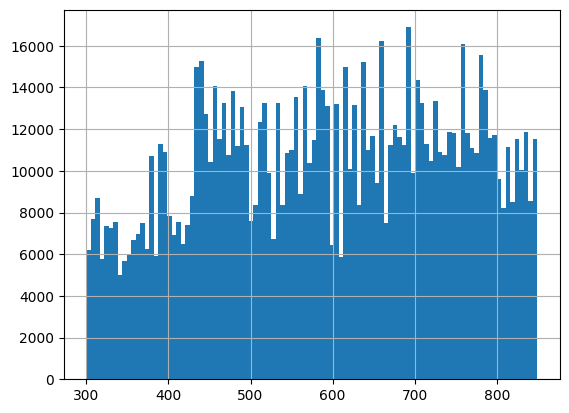

In [135]:
train['Credit Score'].hist(bins=100)

<Axes: >

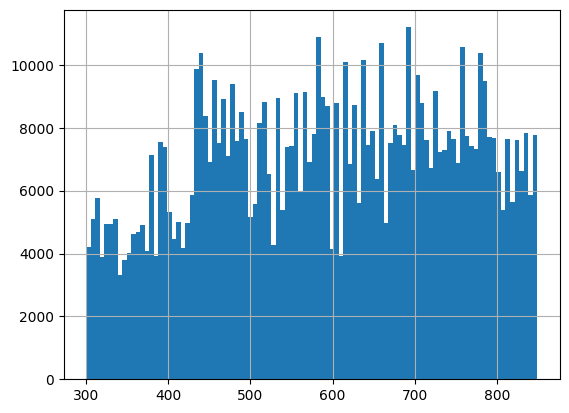

In [136]:
test['Credit Score'].hist(bins=100)

/tmp/ipykernel_8876/4026228438.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df[col], palette='muted')


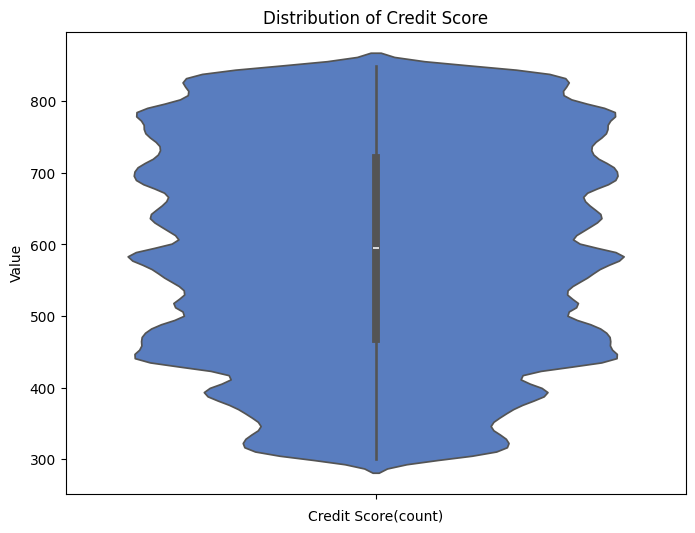

In [255]:
violin_plot(train, "Credit Score")

/tmp/ipykernel_8876/4026228438.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df[col], palette='muted')


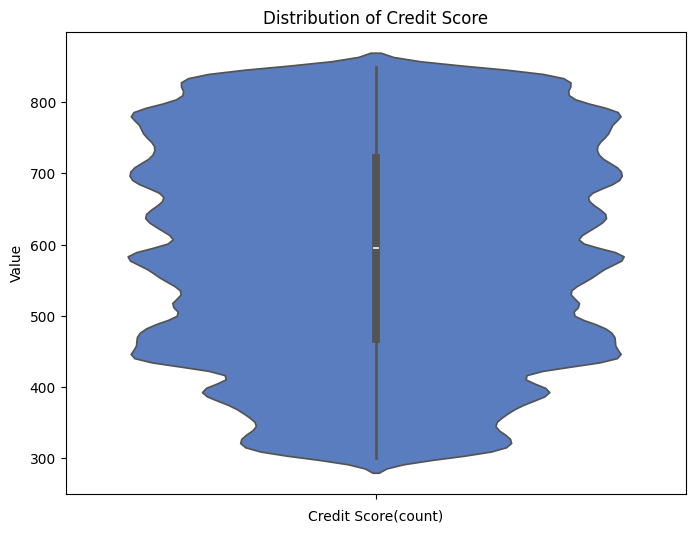

In [256]:
violin_plot(test, "Credit Score")

##### Missing values

In [274]:
# missing values 1
cat = 'Credit Score'
calculate_mvrate(train[cat]), calculate_mvrate(test[cat])

('11.49%', '11.43%')

- opinion
    - ratio type
    - 결측시 중앙값 주입을 한다
    - 이상치는 보이지않는다

In [300]:
cat = "Credit Score"
EDA_result['type'][cat] = "ratio"
EDA_result['mv_process'][cat] = "median"
EDA_result['transform'][cat] = ""

#### 15) Insurance Duration

##### dtype

In [141]:
# type
train['Insurance Duration'].map(type).value_counts()

Insurance Duration
<class 'float'>    1200000
Name: count, dtype: int64

In [142]:
# type
test['Insurance Duration'].map(type).value_counts()

Insurance Duration
<class 'float'>    800000
Name: count, dtype: int64

##### Descriptive statistics

In [143]:
train['Insurance Duration'].describe().map(int)

count    1199999
mean           5
std            2
min            1
25%            3
50%            5
75%            7
max            9
Name: Insurance Duration, dtype: int64

In [144]:
test['Insurance Duration'].describe().map(int)

count    799998
mean          5
std           2
min           1
25%           3
50%           5
75%           7
max           9
Name: Insurance Duration, dtype: int64

<Axes: >

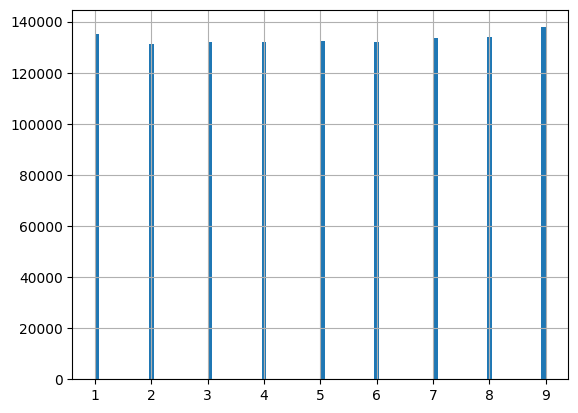

In [145]:
train['Insurance Duration'].hist(bins=100)

<Axes: >

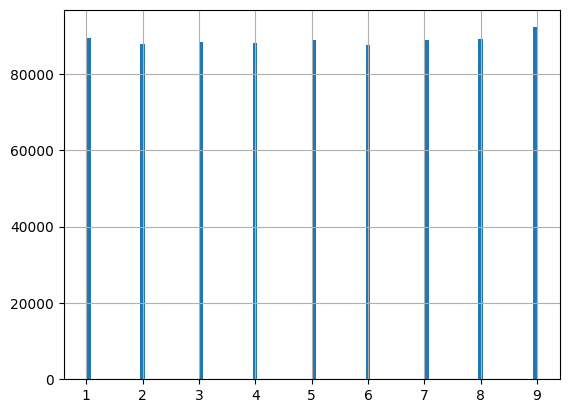

In [146]:
test['Insurance Duration'].hist(bins=100)

##### Missing values

In [275]:
# missing values 1
cat = 'Insurance Duration'
calculate_mvrate(train[cat]), calculate_mvrate(test[cat])

('0.0%', '0.0%')

- opinion
    - interval type
    - 결측시 중앙값 주입을 한다
    - 이상치는 보이지않는다

In [301]:
cat = "Insurance Duration"
EDA_result['type'][cat] = "interval"
EDA_result['mv_process'][cat] = "median"
EDA_result['transform'][cat] = ""

#### 16) Policy Start Date

##### dtype

In [149]:
train['Policy Start Date'] = pd.to_datetime(train['Policy Start Date'])

In [150]:
test['Policy Start Date'] = pd.to_datetime(train['Policy Start Date'])

In [151]:
# type
train['Policy Start Date'].map(type).value_counts()

Policy Start Date
<class 'pandas._libs.tslibs.timestamps.Timestamp'>    1200000
Name: count, dtype: int64

In [152]:
# type
test['Policy Start Date'].map(type).value_counts()

Policy Start Date
<class 'pandas._libs.tslibs.timestamps.Timestamp'>    800000
Name: count, dtype: int64

##### Descriptive statistics

In [153]:
train['Policy Start Date'].describe()

count                          1200000
mean     2022-02-13 05:06:30.972380672
min         2019-08-17 15:21:39.080371
25%      2020-11-20 15:21:39.121168896
50%      2022-02-14 15:21:39.151731968
75%      2023-05-06 15:21:39.182597120
max         2024-08-15 15:21:39.287115
Name: Policy Start Date, dtype: object

In [154]:
test['Policy Start Date'].describe()

count                           800000
mean     2022-02-13 08:00:08.400426496
min         2019-08-17 15:21:39.080440
25%      2020-11-19 15:21:39.237117952
50%      2022-02-14 15:21:39.134960128
75%      2023-05-07 15:21:39.093680896
max         2024-08-15 15:21:39.287115
Name: Policy Start Date, dtype: object

<Axes: >

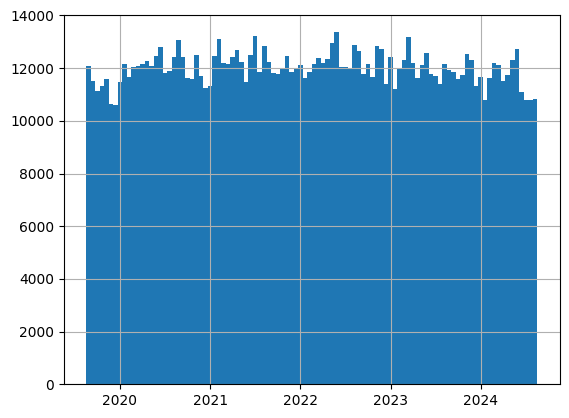

In [155]:
train['Policy Start Date'].hist(bins=100)

<Axes: >

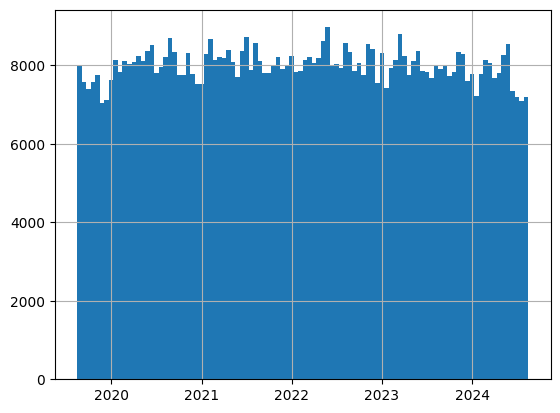

In [156]:
test['Policy Start Date'].hist(bins=100)

/tmp/ipykernel_8876/4026228438.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df[col], palette='muted')


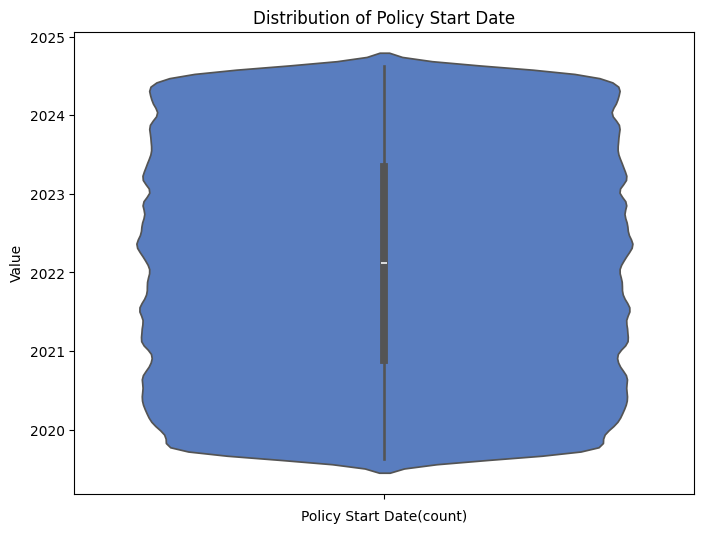

In [257]:
violin_plot(train, "Policy Start Date")

/tmp/ipykernel_8876/4026228438.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df[col], palette='muted')


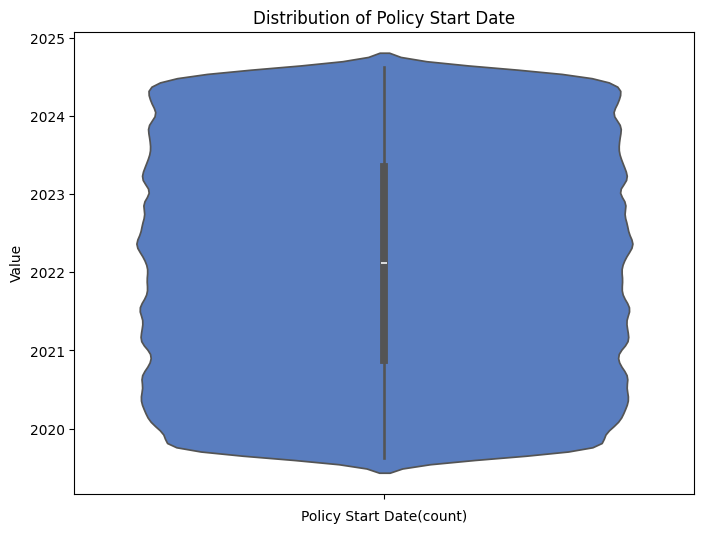

In [258]:
violin_plot(test, "Policy Start Date")

##### Missing values

In [276]:
# missing values 1
cat = 'Policy Start Date'
calculate_mvrate(train[cat]), calculate_mvrate(test[cat])

('0.0%', '0.0%')

- opinion
    - ratio(datetime) type
    - 가장 최근 시간인 24년 8월 15일 데이터를 0으로 기준삼아 과거일 수록 커지도록 변환한다. 단위는 초로하며 추후 기준일을 바꾸거나 단위를 바꾼다
    - 결측시 평균 주입을 한다
    - 이상치는 보이지않는다

In [302]:
cat = "Policy Start Date"
EDA_result['type'][cat] = "ratio"
EDA_result['mv_process'][cat] = "mean"
EDA_result['transform'][cat] = "datetime"

#### 17) Customer Feedback

##### dtype

In [161]:
# type
train['Customer Feedback'].dropna().map(type).value_counts()

Customer Feedback
<class 'str'>    1122176
Name: count, dtype: int64

In [162]:
# type
test['Customer Feedback'].dropna().map(type).value_counts()

Customer Feedback
<class 'str'>    747724
Name: count, dtype: int64

##### Descriptive statistics

In [163]:
train['Customer Feedback'].describe()

count     1122176
unique          3
top       Average
freq       377905
Name: Customer Feedback, dtype: object

In [164]:
test['Customer Feedback'].describe()

count      747724
unique          3
top       Average
freq       251217
Name: Customer Feedback, dtype: object

<Axes: xlabel='Customer Feedback'>

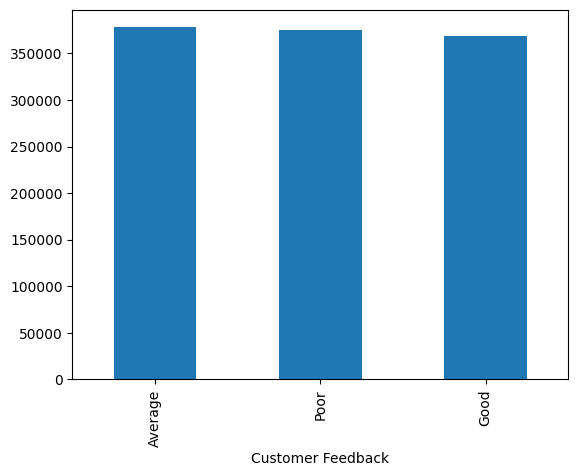

In [165]:
train['Customer Feedback'].value_counts().plot(kind='bar')

<Axes: xlabel='Customer Feedback'>

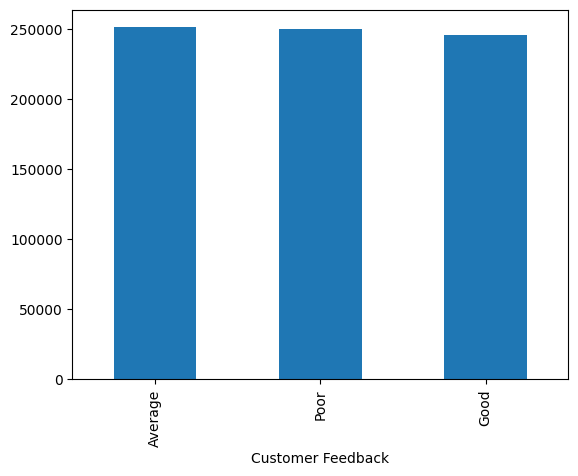

In [166]:
test['Customer Feedback'].value_counts().plot(kind='bar')

##### Missing values

In [277]:
# missing values 1
cat = 'Customer Feedback'
calculate_mvrate(train[cat]), calculate_mvrate(test[cat])

('6.49%', '6.53%')

- opinion
    - ordinal type
    - 변환 후 결측시 중앙값 주입을 한다
    - 이상치는 보이지않는다

In [304]:
cat = 'Customer Feedback'
EDA_result['type'][cat] = "ordinal"
EDA_result['mv_process'][cat] = "median"
EDA_result['transform'][cat] = "encoding(ordinal)"

#### 18) Smoking Status

##### dtype

In [169]:
# type
train['Smoking Status'].map(type).value_counts()

Smoking Status
<class 'str'>    1200000
Name: count, dtype: int64

In [170]:
# type
test['Smoking Status'].map(type).value_counts()

Smoking Status
<class 'str'>    800000
Name: count, dtype: int64

##### Descriptive statistics

In [171]:
train['Smoking Status'].describe()

count     1200000
unique          2
top           Yes
freq       601873
Name: Smoking Status, dtype: object

In [172]:
test['Smoking Status'].describe()

count     800000
unique         2
top          Yes
freq      401859
Name: Smoking Status, dtype: object

<Axes: xlabel='Smoking Status'>

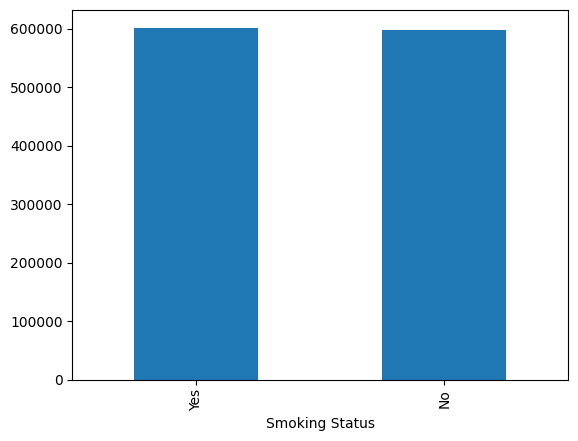

In [173]:
train['Smoking Status'].value_counts().plot(kind='bar')

<Axes: xlabel='Smoking Status'>

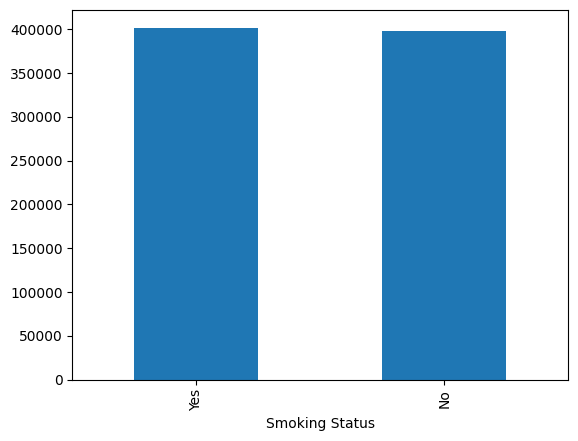

In [174]:
test['Smoking Status'].value_counts().plot(kind='bar')

##### Missing values

In [278]:
# missing values 1
cat = 'Smoking Status'
calculate_mvrate(train[cat]), calculate_mvrate(test[cat])

('0.0%', '0.0%')

- opinion
    - nominal type(bool)
    - 결측시 최빈값 주입을 한다
    - 이상치는 보이지않는다

In [305]:
cat = 'Smoking Status'
EDA_result['type'][cat] = "nominal"
EDA_result['mv_process'][cat] = "mode"
EDA_result['transform'][cat] = "encoding(nominal)"

#### 19) Exercise Frequency

##### dtype

In [177]:
# type
train['Exercise Frequency'].map(type).value_counts()

Exercise Frequency
<class 'str'>    1200000
Name: count, dtype: int64

In [178]:
# type
test['Exercise Frequency'].map(type).value_counts()

Exercise Frequency
<class 'str'>    800000
Name: count, dtype: int64

##### Descriptive statistics

In [179]:
train['Exercise Frequency'].describe()

count     1200000
unique          4
top        Weekly
freq       306179
Name: Exercise Frequency, dtype: object

In [180]:
test['Exercise Frequency'].describe()

count     800000
unique         4
top       Weekly
freq      204514
Name: Exercise Frequency, dtype: object

<Axes: xlabel='Exercise Frequency'>

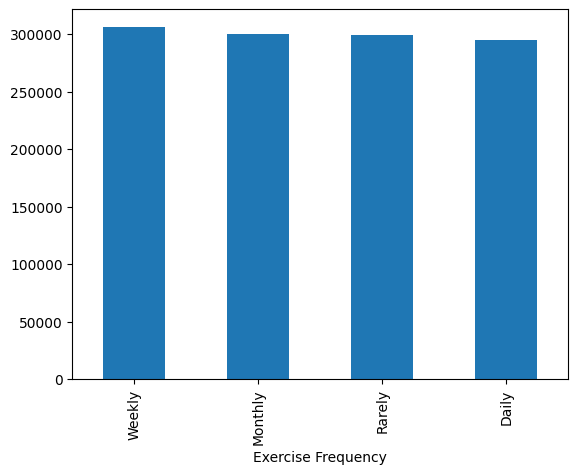

In [181]:
train['Exercise Frequency'].value_counts().plot(kind='bar')

<Axes: xlabel='Exercise Frequency'>

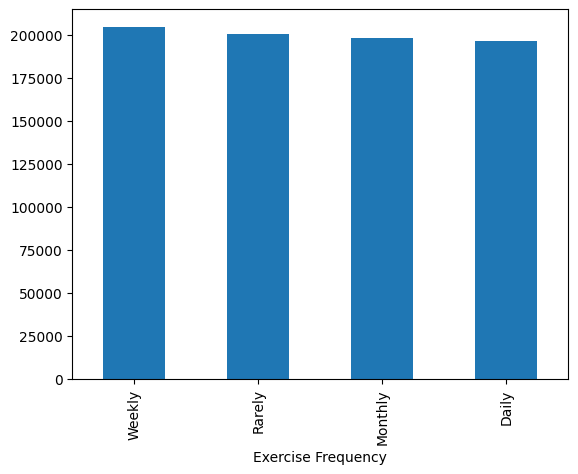

In [182]:
test['Exercise Frequency'].value_counts().plot(kind='bar')

##### Missing values

In [279]:
# missing values 1
cat = 'Exercise Frequency'
calculate_mvrate(train[cat]), calculate_mvrate(test[cat])

('0.0%', '0.0%')

- opinion
    - nominal type 이지만 ordinal 변환 가능
    - ordinal 변환 후 중앙값 주입을 한다.
    - 이상치는 보이지않는다

In [306]:
cat = 'Exercise Frequency'
EDA_result['type'][cat] = "ordinal"
EDA_result['mv_process'][cat] = "median"
EDA_result['transform'][cat] = "encoding(ordinal)"

#### 20) Property Type

##### dtype

In [185]:
# type
train['Property Type'].map(type).value_counts()

Property Type
<class 'str'>    1200000
Name: count, dtype: int64

In [186]:
# type
test['Property Type'].map(type).value_counts()

Property Type
<class 'str'>    800000
Name: count, dtype: int64

##### Descriptive statistics

In [187]:
train['Property Type'].describe()

count     1200000
unique          3
top         House
freq       400349
Name: Property Type, dtype: object

In [188]:
test['Property Type'].describe()

count     800000
unique         3
top        House
freq      267151
Name: Property Type, dtype: object

<Axes: xlabel='Property Type'>

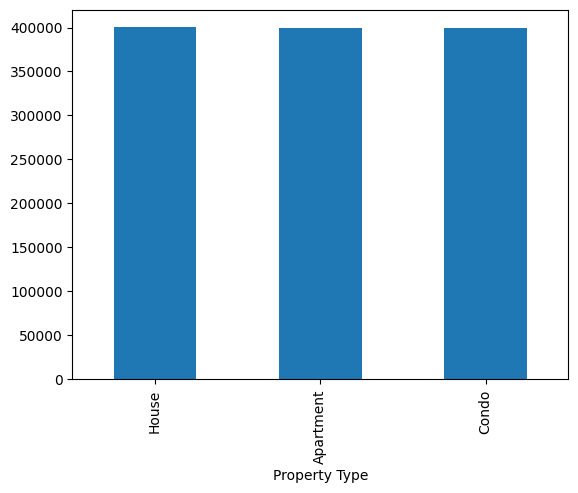

In [189]:
train['Property Type'].value_counts().plot(kind='bar')

<Axes: xlabel='Property Type'>

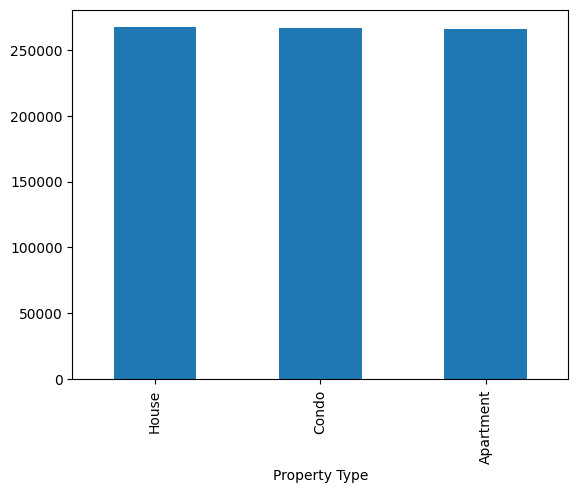

In [190]:
test['Property Type'].value_counts().plot(kind='bar')

##### Missing values

In [281]:
# missing values 1
cat = 'Property Type'
calculate_mvrate(train[cat]), calculate_mvrate(test[cat])

('0.0%', '0.0%')

- opinion
    - nominal type
    - 결측이 없지만 결측시 최빈값 주입을 한다.
    - 이상치는 보이지않는다

In [307]:
cat = 'Property Type'
EDA_result['type'][cat] = "nominal"
EDA_result['mv_process'][cat] = "mode"
EDA_result['transform'][cat] = "encoding(nominal)"

# 2. Conclusion

In [319]:
EDA_result

,type,mv_process,transform
name,,,
id,interval,,drop
Age,interval,median,
Gender,nominal,random(uniform),encoding(nominal)
Annual Income,ratio,median,box-cox
Marital Status,nominal,random(uniform),encoding(nominal)
Number of Dependents,NaN,NaN,NaN
Education Level,ordinal,mode,encoding(ordinal)
Occupation,nominal,random(uniform),encoding(nominal)
Health Score,ratio,mean,


- 모델 요구사항
    1. 회귀모델
    2. 다변수
- 베이스라인 모델
    1. Dummy regressor(mean)
    2. Linear regressor
    3. lgbm

# 3. Plan

1. baseline.ipynb
    1. dummy regressor 시도
    2. linear regressor 시도
    3. lgbm 시도
    4. process 통일 및 추상화
    5. mlflow 도입
2. Diagnostic Analysis
    1. under/over fitting
    2. residual analysis
    3. Feature importance
    4. planning